# Film Casus

Welkom bij het onderzoek van Team 1! 

- Gemaakt door Yula, Joel en Pim.

## Introduction 

In dit project gaan wij 2 filmdatasets onderzoeken. 

Voor dat we gaan beginnen gaan we eerste nog **data begrijpen** en **data voorbereiden**.

We beantwoorden totaal 3 onderzoeksvragen：
1. In hoeverre is de omzet van een film te voorspellen op basis van de populariteit op Facebook en IMDB？
2. Is het mogelijk om te voorspellen of een film een oscar zal winnen of niet?
3. Hoe kunnen budget en omzet worden gebruikt om logische clusters van de films te vinden?

## Data Understanding

**Alle imports**

In [176]:
import functies as fn
import pandas as pd
from IPython.display import Image, display
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import numpy as np
from sklearn.metrics import r2_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as lm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import graphviz
from sklearn.mixture import GaussianMixture as gmm
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


**Laad de dataset**

In [177]:
dfr = pd.read_csv('data/movie-1.csv')

# Toon de maximale informatie die de dataframe kan geven.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Formatteer alle grote getallen voor een betere leesbaarheid.
pd.set_option('display.float_format', '{:,.2f}'.format)

**Kopie van de dataset**


Een kopie van de gegevens maken om mee te werken,
zodat we het oorspronkelijke dataset niet wijzigen.

In [178]:
df = dfr.copy()

**Een kijkje nemen naar de gegevens die we hebben gekregen.**

In [179]:
df.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,"1,000.00","760,505,847.00",Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.00,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,"3,054.00",English,USA,PG-13,"237,000,000.00","2,009.00",936.00,7.90,1.78,33000
1,Color,Gore Verbinski,302.00,169.00,563.00,"1,000.00",Orlando Bloom,"40,000.00","309,404,152.00",Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.00,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,"1,238.00",English,USA,PG-13,"300,000,000.00","2,007.00","5,000.00",7.10,2.35,0
2,Color,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,"11,000.00","200,074,175.00",Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.00,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.00,English,UK,PG-13,"245,000,000.00","2,015.00",393.00,6.80,2.35,85000
3,Color,Christopher Nolan,813.00,164.00,"22,000.00","23,000.00",Christian Bale,"27,000.00","448,130,642.00",Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.00,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,"2,701.00",English,USA,PG-13,"250,000,000.00","2,012.00","23,000.00",8.50,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.00,NaN,Rob Walker,131.00,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.00,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.00,7.10,NaN,0


**Haal de kolomnamen op om te zien met wat voor soort variabelen we werken**

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

## Meetniveaus

In [254]:
#  alle meetniveaus in datafeame zetten
data = {
    "Nominaal": [
        "actor_1_name", "actor_2_name", "actor_3_name", "color", "country",
        "director_name", "genres", "language", "movie_imdb_link", "movie_title", "plot_keywords"
    ],
    "Ordinaal": ["content_rating"],
    "Discreet": [
        "facenumber_in_poster", "num_critic_for_reviews", "num_user_for_reviews",
        "num_voted_users", "title_year"
    ],
    "Continu": [
        "actor_1_facebook_likes", "actor_2_facebook_likes", "actor_3_facebook_likes",
        "aspect_ratio", "budget", "cast_total_facebook_likes", "director_facebook_likes",
        "duration", "gross", "imdb_score", "movie_facebook_likes"
    ]
}

df = pd.DataFrame.from_dict(data, orient='index').transpose()

print(df)

           Nominaal        Ordinaal                Discreet  \
0      actor_1_name  content_rating    facenumber_in_poster   
1      actor_2_name            None  num_critic_for_reviews   
2      actor_3_name            None    num_user_for_reviews   
3             color            None         num_voted_users   
4           country            None              title_year   
5     director_name            None                    None   
6            genres            None                    None   
7          language            None                    None   
8   movie_imdb_link            None                    None   
9       movie_title            None                    None   
10    plot_keywords            None                    None   

                      Continu  
0      actor_1_facebook_likes  
1      actor_2_facebook_likes  
2      actor_3_facebook_likes  
3                aspect_ratio  
4                      budget  
5   cast_total_facebook_likes  
6     director_face

## Data Preparation

**Doel- en kenmerkenvariabelen**


De target variabel is al gegeven, namelijk de 'gross' kolom.

De gross is afhankelijk van de feature variables, die zijn onafhankelijk.

We hebben gekozen voor deze feature variabelen omdat deze kolommen het best passen bij onze onderzoeksvraag. 

We moeten het voorspellen aan de hand van de populariteit van facebook en IMDB. Ofwel de statistieken van deze 2.

In [182]:
featureVariables = ['director_facebook_likes', 
                    'actor_1_facebook_likes', 
                    'actor_2_facebook_likes', 
                    'actor_3_facebook_likes', 
                    'cast_total_facebook_likes', 
                    'movie_facebook_likes', 
                    'imdb_score']

targetVariable = ['gross']

**Maak een andere dataframe met alleen de kolommen waarin we geïnteresseerd zijn.**

Door alleen deze te nemen, gaat onze dataset van 28 naar 8 kolommen.

In [183]:
print(df.shape) #check impact
df = df[featureVariables + targetVariable]
print(df.shape) #check impact

(5043, 28)
(5043, 8)


**Controleer NaN-waarden**

Verwijder voorlopig alle NaN-waarden in de kenmerken- en doelvariabelen. Later zullen we verder onderzoeken hoe we deze op de juiste manier kunnen verwerken.

In [184]:
df.isna().sum()

director_facebook_likes      104
actor_1_facebook_likes         7
actor_2_facebook_likes        13
actor_3_facebook_likes        23
cast_total_facebook_likes      0
movie_facebook_likes           0
imdb_score                     0
gross                        884
dtype: int64

We zullen alle NaN-waarden verwijderen. We kunnen ze niet vervangen, omdat de meerderheid onze doelvariabele bevat.

In [185]:
print(df.shape) #check impact
df = df.dropna()
print(df.shape) #check impact

(5043, 8)
(4143, 8)


**Nu zullen we alle kolommen analyseren om te controleren op anomalieën.**

In [186]:
df.describe(include="all")

,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,imdb_score,gross
count,"4,143.00","4,143.00","4,143.00","4,143.00","4,143.00","4,143.00","4,143.00","4,143.00"
mean,749.23,"7,361.56","1,892.58",724.28,"10,920.21","8,757.63",6.47,"48,625,081.48"
std,"2,950.71","15,067.61","4,374.79","1,811.38","18,541.78","20,822.02",1.05,"68,528,637.84"
min,0.00,0.00,0.00,0.00,0.00,0.00,1.60,162.00
25%,10.00,702.00,345.00,173.00,"1,755.50",0.00,5.90,"5,404,758.50"
50%,57.00,"1,000.00",651.00,416.00,"3,715.00",186.00,6.60,"25,592,632.00"
75%,218.50,"12,000.00",962.00,676.00,"15,601.50","10,000.00",7.20,"62,427,289.50"
max,"23,000.00","640,000.00","137,000.00","23,000.00","656,730.00","349,000.00",9.30,"760,505,847.00"


Alle statistieken zien er schoon uit.

Alle kolommen met 'namen' bevatten NaN en getallen waar dit verwacht wordt.

Alle kolommen met 'likes' bevatten NaN en een getal waar dit verwacht wordt. Ook geen vreemde minimale of maximale waarden.

De kolom 'imdb_score' heeft alleen waarden tussen 0 en 10, wat verwacht wordt.

En tot slot heeft de kolom 'gross' een natuurlijke orde van grootte van min tot max.

### FeatureVariables met histogram

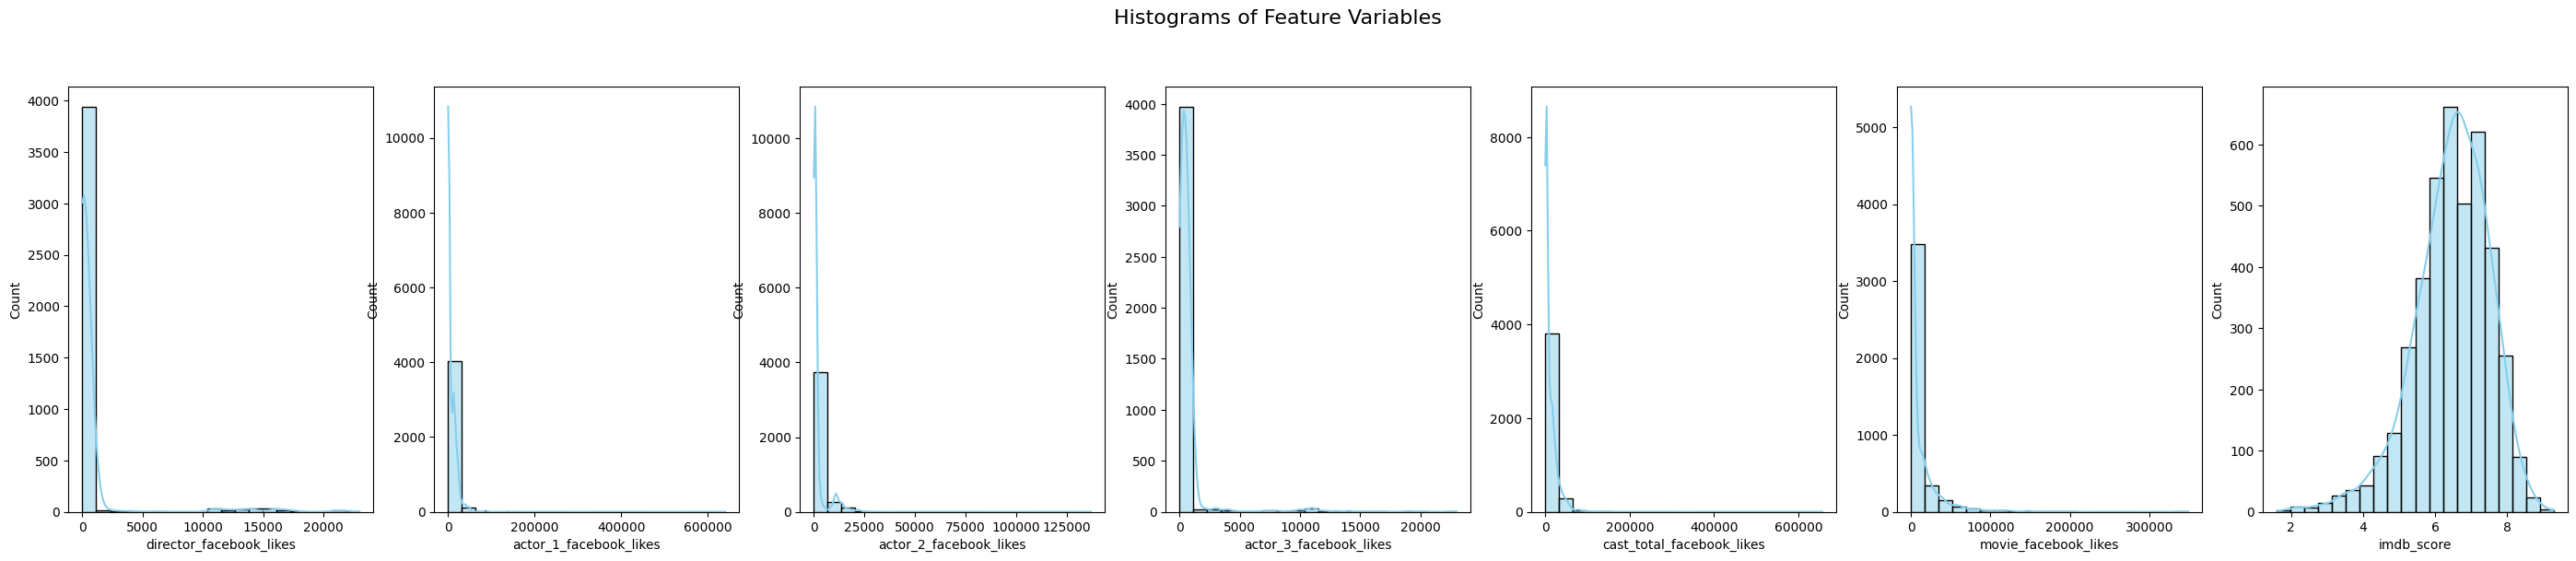

In [187]:
fn.plot_histograms(df, featureVariables)

**imdb_score**

De verdeling van deze featureVariabele is relatief normaal verdeeld, wat betekent dat de meeste films een IMDb-score tussen 5 en 7 hebben.

**Andere Variabelen met likes**

Veel van deze featureVariabelen hebben een scheve verdeling, waarbij de meeste films weinig likes hebben en een paar films veel likes. Dit kan zijn door heel bekend regisseurs en acteurs in bepaald films.

### Featurevariables met boxplots en uitschieters

We zullen geen van de uitschieters uit onze doelvariabele 'gross' verwijderen. Voor onze kenmerkenvariabelen zijn er echter enkele vreemde uitschieters en veel regisseurs en acteurs met 0 likes op Facebook. 

Er is super veel variatie tussen alle feature variabelen. Wij verwachten dat films met een hoge like score op alle gebieden, hoger zal scoren in hun omzet. Dus Wij zullen geen uitschieters verwijderen.

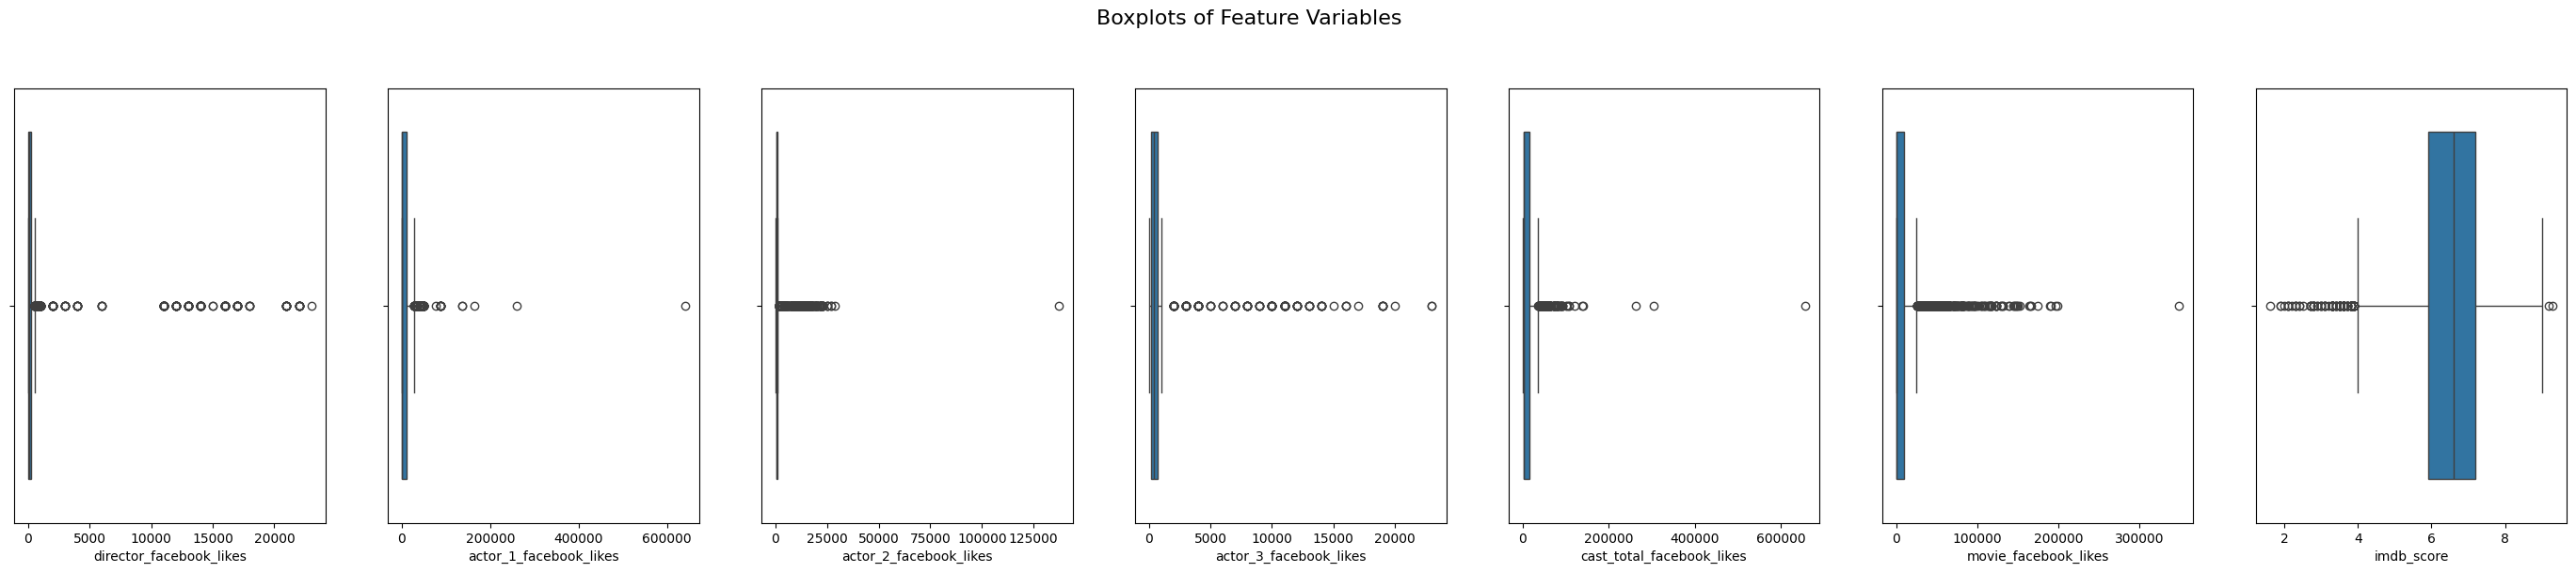

In [188]:
fn.plot_boxplots(df, featureVariables)

**imdb_score**

Deze featureVariabel heeft geen duidelijke outliers. Dit maakt het betrouwbaarder en gemakkelijker te gebruiken in onze modellen.

**Andere Variabelen met likes**

Zoals wij bij histogram hebben gezien, veel van deze featureVariabelen hebben een scheve verdeling, waardoor modellen mogelijk worden beïnvloed.

### Correlatie tussen TargetVariable en FeatureVariables

We gaan hier met scatterplots onderzoeken wat de relatie is tussen het aantal Facebook-likes van de regisseur, de acteurs, de film, de IMDb-score en de hele cast en de totale opbrengst van de film.

**Scatterplots**

Bereken de feature variabelen tegenover de doelvariabele, zodat we kunnen zien welke kenmerken (enigszins) belangrijk zijn voor de doelvariabele

Zoals je kunt aflezen is er geen enkele feature variabele die met zekerheid een positieve correlatie heeft. De hoogste heeft een 0.38 wat maar een matige positieve correlatie weergeeft.

In [189]:
correlation = df[featureVariables + targetVariable].corr()['gross'].sort_values(ascending=False)
print(correlation)

gross                       1.00
movie_facebook_likes        0.38
actor_3_facebook_likes      0.31
actor_2_facebook_likes      0.26
cast_total_facebook_likes   0.25
imdb_score                  0.20
actor_1_facebook_likes      0.15
director_facebook_likes     0.14
Name: gross, dtype: float64


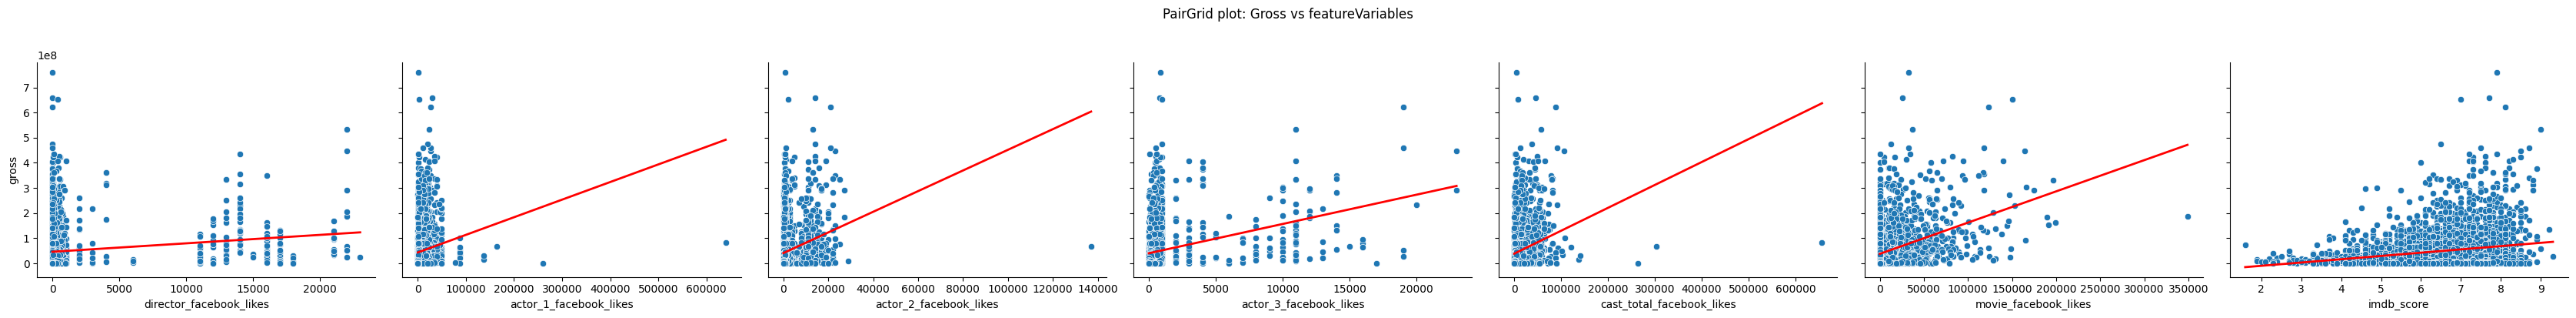

In [190]:
fn.pairgrid_plot(df, featureVariables, targetVariable)

**Resultaat**

Deze plot toont de relatie tussen de targetvariabele gross en de verschillende featurevariabelen. De **blauwe punten** zijn de gegevenspunten en de **rode lijn** is een lineaire regressielijn. Hoe schuiner de lijn, hoe hoger de correlatie tussen beide kenmerken.

We zien duidelijk dat een stijgende rode lijn, zoals bij movie_facebook_likes, een positieve relatie heeft. Dit klopt ook, want movie_facebook_likes heeft een positieve correlatie van 0,38.

Bij een vlakke lijn, zoals bij director_facebook_likes, is er een zwakke of bijna geen relatie.

## Onderzoeksvraag 1: In hoeverre is de omzet van een film te voorspellen op basis van de populariteit op Facebook en IMDB


## Modellen ##

Hier gaan we de modellen toepassen op onze data. 

Als eerst gaan we een train test split maken.

In [191]:
X = df[featureVariables]
y = df[targetVariable]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

### Baseline

Een baseline score is nodig om te kijken hoe ver onze modellen hiervan afwijken. Als de score van ons complexere model eronder zit doet het model het beter dan de baseline model wat goed is, als de score erboven zit doet het model het slechter en is dit een reden om dat model niet te gaan gebruiken.

De baseline bereken je met de 'mean_squared_error' uitgedrukt in RMSE. 

De baseline score geeft ons een referentie voor onze modelprestaties. Elk model dat op zijn minst beter presteert dan deze baseline is een verbetering.

In [192]:
# Dit gemiddelde word als de "baseline" voorspelling gebruikt voor alle tests.
baseline = np.mean(y_train)

# Dit betekent dat elke voorspelling hetzelfde is en gelijk is aan het gemiddelde van y_train.
y_pred = np.ones(len(X_test)) * baseline

# 'squared=False' geeft aan dat de wortel van de mean squared errror word genomen, zodat je de RMSE krijgt.
baseline_score = mean_squared_error(y_test, y_pred, squared=False)

print(f"RMSE: {baseline_score:.2f}")

RMSE: 69771005.94


### Linieare Regressie

Als eerst gaan we linieare regressie toepassen. 

De data gaan we ook normaliseren. Normaliseren is nodig om het linieare regressie model beter te laten werken omdat het model werkt op relatieve afstanden van elkaar.

Bij dit model hebben we niet gekozen voor hyperparameters, dit model is vrij simpel en geeft alleen een directe oplossing door de normale vergelijking.

In [193]:
scaler = StandardScaler()

# Een genormaliseerde train en test maken
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [194]:
# Maak een lineaire regressie model aan
lr = lm.LinearRegression()

# Fit het model met de trainings data
lr.fit(X_train_scaled, y_train)

# Bereken de voorspellingen voor de test data
y_pred = lr.predict(X_test_scaled)

# Bereken de RMSE
lr_score = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {lr_score:.2f}")

# Bereken de R^2 score voor het regressiemodel
lr_r2 = r2_score(y_test, y_pred)
print(f"R-squared: {lr_r2:.2f}")

Root Mean Squared Error: 58977858.91
R-squared: 0.29


De uitkomst van dit model is 58977858.91 en zit met 14,94% onder het baseline model wat goed is.

De R-squared is 0.29. Dit model kan ongeveer 29% van de variatie in de variabele kan verklaren. 

Dit is niet al te best. Dit duid op een niet linieare relatie. (dit hadden we ook gezien bij de correlatie plots)

### KNN

Hier gaan we KNN toepassen. De hyperparameters zijn n_neighbors=15, weights="distance", p=2.

We hebben gekozen voor N_neighbors=15 want uit code blijkt beste aantal buren is gelijk aan 15.

Ook hebben we gekozen voor p=2. Dit neemt de euclidische afstand, ipv p=1 de minkowski afstand. Dit geeft voor onze dataset het beste resultaat.

C:\Users\yulas\AppData\Local\Temp\ipykernel_23504\2913161230.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


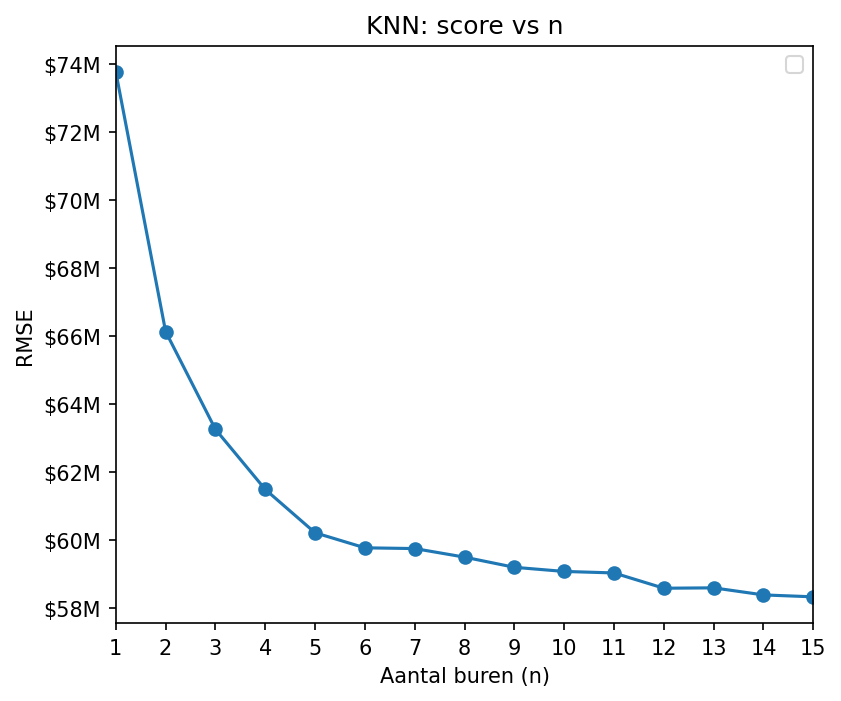

In [195]:
# Code uit de les van CM09
data = []

max_n = 15

for i in range(1, max_n + 1):
    knn = KNeighborsRegressor(n_neighbors=i, weights="distance", p=2)

    # Fitten met trainingsdaata
    knn.fit(X_train_scaled, y_train)

    # Bereken de voorspellingen
    y_pred = knn.predict(X_test_scaled)

    # Bereken de RMSE
    knn_score = mean_squared_error(y_test, y_pred, squared=False)

    data.append([i, knn_score])


df_knn = pd.DataFrame(data, columns=['n', 'RMSE'])

fig = plt.figure(figsize=(6,5), dpi=150)
ax = plt.axes()

ax.set(xlim=(1,max_n),
       xlabel='Aantal buren (n)',
       ylabel='RMSE',
       title='KNN: score vs n')

ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.ticklabel_format(useOffset=False)
ax.plot(df_knn['n'], df_knn['RMSE'], '-o')

ax.yaxis.set_major_formatter(FuncFormatter(fn.euro_formatter))

ax.legend()
plt.show()

In [196]:
# beste aantal buren berekenen
best_n = None
best_rmse = float('inf')

for index, row in df_knn.iterrows():
    if row['RMSE'] < best_rmse:
        best_n = row['n']
        best_rmse = row['RMSE']

print(f"Beste n: {int(best_n)} met RMSE = {best_rmse:.2f}")

Beste n: 15 met RMSE = 58339596.58


In [197]:
# KNN regressie model met hyperparameters
knn = KNeighborsRegressor(n_neighbors=int(best_n), weights="distance", p=2)

# Fitten met trainingsdaata
knn.fit(X_train_scaled, y_train)

# Bereken de voorspellingen
y_pred = knn.predict(X_test_scaled)

# Bereken de RMSE
knn_score = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {knn_score:.2f}")

# Bereken de R^2 score voor het KNN model
knn_r2 = r2_score(y_test, y_pred)
print(f"R-squared: {knn_r2:.2f}")

Root Mean Squared Error: 58339596.58
R-squared: 0.30


De uitkomst van dit model is 58.339.596,58, wat 16,37% onder het baseline model ligt, wat goed is. 

De R-squared waarde is 0,30, wat aangeeft dat dit model ongeveer 30% van de variatie in de afhankelijke variabele kan verklaren, wat nog steeds niet goed genoeg is. 

Dit wijst op een niet-lineaire relatie tussen de variabelen (dit was ook te zien in de correlatieplots).

### Decision Tree Regressor

We passen nu een decision tree regressor toe. Deze keuze hebben we gemaakt omdat deze beter om zou moeten kunnen gaan met niet lineare verbanden. 

Wat goed uitkomt want uit ons correlatie onderzoek is een slechte correlatie gekomen. 

We hoeven ook geen gebruik te maken van een scalar om te normaliseren. Een DTR kan hiermee omgaan.

We gebruiken max_depth=4 omdat dit het 'beste' model is wat we hebben. Zelfs door veel verder te gaan in de boom wordt de score alleen maar slechter.

In [198]:
# Data splitsen in train en test sets
X_train, X_test, y_train, y_test = train_test_split(df[featureVariables], df[targetVariable], test_size=0.2, random_state=42)

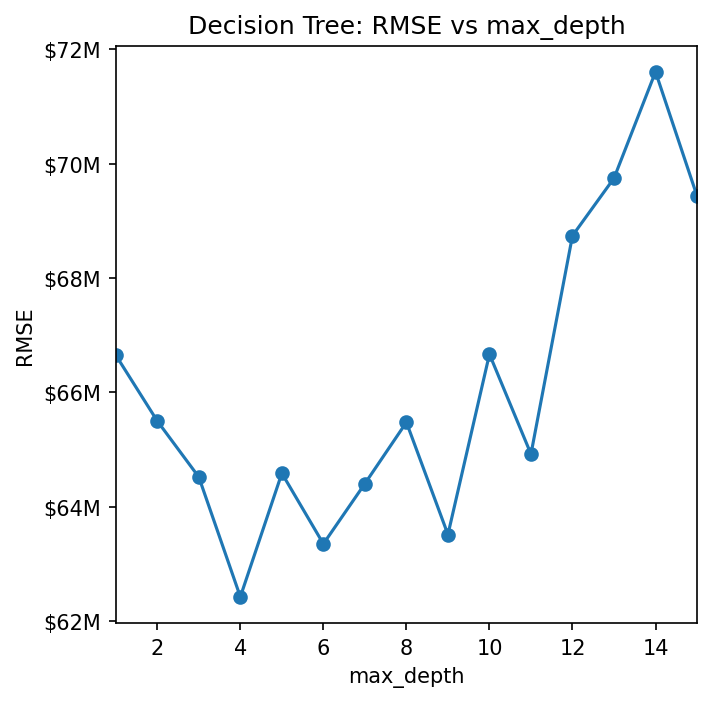

In [199]:
data = []

max_depth = 15

for i in range(1, max_depth + 1):
    # DTR met alle max_depths
    tree = DecisionTreeRegressor(max_depth=i, random_state=42)
    
    # Fitten met niet gescalede data
    tree.fit(X_train, y_train)
    
    # Bereken de voorspellingen
    y_pred = tree.predict(X_test)
    
    # Bereken de RMSE
    tree_score = mean_squared_error(y_test, y_pred, squared=False)
    
    data.append([i, tree_score])

df_tree = pd.DataFrame(data, columns=['max_depth', 'RMSE'])

# Plotten van de resultaten
fig = plt.figure(figsize=(5, 5), dpi=150)
ax = plt.axes()

# Instellen van de plotlimieten en labels
ax.set(xlim=(1, max_depth),
       xlabel='max_depth',
       ylabel='RMSE',
       title='Decision Tree: RMSE vs max_depth')

ax.plot(df_tree['max_depth'], df_tree['RMSE'], '-o')

ax.yaxis.set_major_formatter(FuncFormatter(fn.euro_formatter))

plt.show()

In [200]:
# Decision Tree Regressor initialiseren en trainen
tree_regressor = DecisionTreeRegressor(max_depth=4,random_state=42)
tree_regressor.fit(X_train, y_train)

# Voorspellingen doen op de test set
y_pred = tree_regressor.predict(X_test)

# Evaluatie van het model
mse = mean_squared_error(y_test, y_pred)
tree_score = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {tree_score:.2f}")

# Bereken de R^2 score voor het Decision Tree model
tree_r2 = r2_score(y_test, y_pred)
print(f"R-squared: {tree_r2:.2f}")

Root Mean Squared Error (RMSE): 62424735.88
R-squared: 0.19


De uitkomst van dit model is 62424735.88, wat met 10,52% boven het baseline model zit wat goed is. 

Een R-squared van 0.19 wat aangeeft dat dit model ongeveer 19% van de variatie in de variabele kan verklaren wat slecht is. 

Dit is niet al te best. Dit duid op een niet linieare relatie. (dit hadden we ook gezien bij de correlatie plots)

## Conclusie onderzoeksvraag 1

In [201]:
#  samenvatting van alle resultaten uit modellen
results = []

results.append(['Linear Regression', lr_score, lr_r2])
results.append(['KNN Regression', knn_score, knn_r2])
results.append(['Decision Tree Regression', tree_score, tree_r2])

df_results = pd.DataFrame(results, columns=['Model', 'RMSE', 'R²'])
print(df_results)

                      Model          RMSE   R²
0         Linear Regression 58,977,858.91 0.29
1            KNN Regression 58,339,596.58 0.30
2  Decision Tree Regression 62,424,735.88 0.19


**Het KNN model** doet het iets beter dan lineaire regressie, maar het verschil is klein. Het KNN model werkt ook beter dan het baseline model en het beslissingsboommodel (DTR). 

Het KNN model heeft R² = 0.30, wat ook niet goed is en betekent dat het model maar 30% van de verschillen in omzet kan verklaren.

**Hiermee concluderen we dat de omzet van een film niet te voorspellen is op basis van de populariteit op facebook en IMDB.**

## Onderzoeksvraag 2: Is het mogelijk om te voorspellen of een film een oscar zal winnen of niet?

Een oscar winnen is een hele eer in de filmindustrie. Het is dus zeer interessant of we wellicht een model kunnen bouwen welke film een oscar zou winnen of niet. Wellicht kunnen we zo een accuraat model bouwen dat het miljarden waard zou zijn. En aangezien elke regrisseur die gefocust is op roem dit graag zou willen weten. Laten we van start gaan! En wellicht rijk worden!

In [202]:
# Inladen db

oscar_db = pd.read_csv('data/the_oscar_award.csv')

In [203]:
# Check of alles correct is ingeladen

oscar_db.sample(5)

,year_film,year_ceremony,ceremony,category,name,film,winner
8108,2000,2001,73,WRITING (Screenplay Written Directly for the S...,Written by Cameron Crowe,Almost Famous,True
10821,2023,2024,96,INTERNATIONAL FEATURE FILM,Japan,Perfect Days,False
3509,1959,1960,32,CINEMATOGRAPHY (Color),Lee Garmes,The Big Fisherman,False
1761,1944,1945,17,SHORT SUBJECT (Cartoon),"Paul Terry, Producer",My Boy Johnny,False
4059,1963,1964,36,SHORT SUBJECT (Live Action),"Walker Stuart, Producer",That's Me,False


We zien hier 7 tabellen terug de Target waarop wij gaan focussen is de 'Winner' tabel. Daarin kunnen we zien of een film een oscar heeft gewonnen of niet.

In [204]:
oscar_db.describe()

,year_film,year_ceremony,ceremony
count,"10,889.00","10,889.00","10,889.00"
mean,"1,976.61","1,977.61",49.63
std,27.36,27.36,27.32
min,"1,927.00","1,928.00",1.00
25%,"1,952.00","1,953.00",25.00
50%,"1,976.00","1,977.00",49.00
75%,"2,001.00","2,002.00",74.00
max,"2,023.00","2,024.00",96.00


Hieruit volgt dat tabel 'ceremony' gewoonweg bijhoudt hoeveel keer de oscar awards zijn gehouden.

In [205]:
oscar_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10889 entries, 0 to 10888
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10889 non-null  int64 
 1   year_ceremony  10889 non-null  int64 
 2   ceremony       10889 non-null  int64 
 3   category       10889 non-null  object
 4   name           10884 non-null  object
 5   film           10570 non-null  object
 6   winner         10889 non-null  bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 521.2+ KB


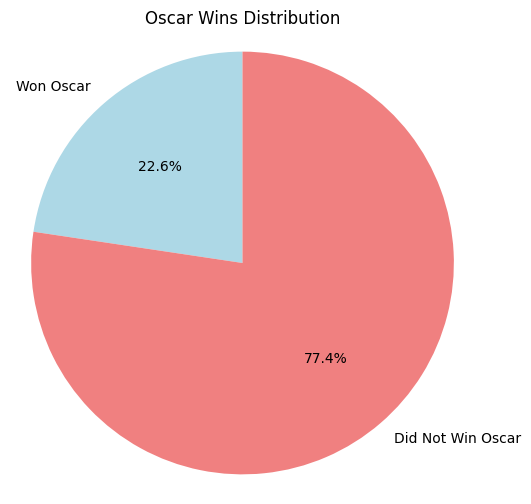

In [206]:
# Check hoeveel True en False er zijn in de Winner tabel
true_count = oscar_db['winner'].value_counts()[True]
false_count = oscar_db['winner'].value_counts()[False]

# Benaming voor de taart diagram
labels = ['Won Oscar', 'Did Not Win Oscar']

# Data om te plotten
sizes = [true_count, false_count]

# Maak taart diagram
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Oscar Wins Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

We zien dus dat minder dan een vierde van de genomineerde een Oscar wint. Maar waar we natuurlijk ook naar moeten kijken is hoe groot de kans is om uberhaupt genomineerd te worden. Daarvoor zullen we de 2 datasets moeten mergen. 

### Databases mergen

We gaan de databases mergen op de 'movie_titel' tabel en de 'name' tabel. We joinen met 'left'.

In [207]:
# Zet de datatypes om naar strings

dfr['movie_title'] = dfr['movie_title'].astype(str)
oscar_db['film'] = oscar_db['film'].astype(str) 

# Normaliseer de data
dfr['movie_title'] = dfr['movie_title'].str.strip().str.lower()
oscar_db['film'] = oscar_db['film'].str.strip().str.lower()

In [208]:
oscar_db['film'].sample(5)

9119                        up
3458           the young lions
7291          schindler's list
3337    foothold on antarctica
8973       slumdog millionaire
Name: film, dtype: object

In [209]:
dfr['movie_title'].sample(5)

5016                            dutch kills
162              how to train your dragon 2
4928      sweet sweetback's baadasssss song
4817    american ninja 2: the confrontation
142                        white house down
Name: movie_title, dtype: object

In [210]:
merged_df = pd.merge(dfr, oscar_db, left_on='movie_title', right_on='film', how='left')

In [211]:
merged_df.sample(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,year_film,year_ceremony,ceremony,category,name,film,winner
564,Color,Quentin Tarantino,765.00,165.00,"16,000.00",265.00,Christoph Waltz,"29,000.00","162,804,648.00",Drama|Western,Leonardo DiCaprio,django unchained,955174,40978,Ato Essandoh,1.00,dynamite|historically inaccurate|ku klux klan|...,http://www.imdb.com/title/tt1853728/?ref_=fn_t...,"1,193.00",English,USA,R,"100,000,000.00","2,012.00","11,000.00",8.50,2.35,199000,"2,012.00","2,013.00",85.00,BEST PICTURE,"Stacey Sher, Reginald Hudlin and Pilar Savone,...",django unchained,False
1366,Color,Mark Waters,142.00,95.00,70.00,512.00,Ivana Milicevic,970.00,"48,291,624.00",Comedy|Fantasy|Romance,Jon Heder,just like heaven,82819,2876,Willie Garson,1.00,apartment|architect|coma|doctor|spirit,http://www.imdb.com/title/tt0425123/?ref_=fn_t...,263.00,English,USA,PG-13,"58,000,000.00","2,005.00",834.00,6.70,1.85,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2159,Color,Rawson Marshall Thurber,289.00,118.00,43.00,651.00,Molly C. Quinn,740.00,"150,368,971.00",Comedy|Crime,Laura-Leigh,we're the millers,316671,3425,Thomas Lennon,4.00,fake family|male frontal nudity|marijuana|mexi...,http://www.imdb.com/title/tt1723121/?ref_=fn_t...,301.00,English,USA,R,"37,000,000.00","2,013.00",707.00,7.00,2.35,35000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6278,Black and White,Stanley Kramer,73.00,186.00,176.00,760.00,Montgomery Clift,877.00,NaN,Drama|War,Maximilian Schell,judgment at nuremberg,44457,3847,Spencer Tracy,0.00,judge|law|nazi|nuremberg|war crime,http://www.imdb.com/title/tt0055031/?ref_=fn_t...,176.00,English,USA,Not Rated,"3,000,000.00","1,961.00",862.00,8.30,1.75,0,"1,961.00","1,962.00",34.00,DIRECTING,Stanley Kramer,judgment at nuremberg,False
6216,Color,Yimou Zhang,85.00,109.00,611.00,4.00,Daoming Chen,878.00,"377,420.00",Drama,Li Gong,coming home,2789,900,Ni Yan,1.00,amnesia|cultural revolution|husband wife relat...,http://www.imdb.com/title/tt3125472/?ref_=fn_t...,20.00,Mandarin,China,PG-13,NaN,"2,014.00",10.00,7.30,2.35,0,"1,978.00","1,979.00",51.00,BEST PICTURE,"Jerome Hellman, Producer",coming home,False


We zien veel NaN waardes bij de kolom film/winner/name. We kunnen er dus vanuit gaan dat deze films niet zijn genomineerd. Laten we een nieuwe categorie maken om dit duidelijk te maken. 

In [212]:
# Voeg een nieuwe kolom toe voor de categorieën
merged_df['categorie'] = merged_df['winner'].apply(
    lambda x: 'Oscar gewonnen' if x == True else ('Oscar genomineerd' if x == False else 'Niet genomineerd')
)

Laten we data nu visualiseren om een mooi beeld te krijgen.

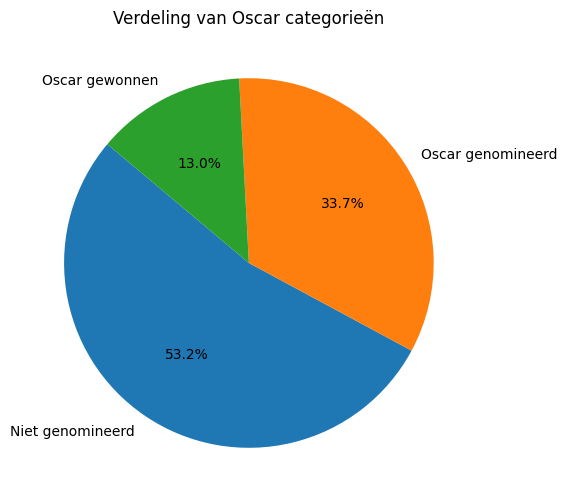

In [213]:
# Data visualiseren
categorie_counts = merged_df['categorie'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(categorie_counts, labels=categorie_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Verdeling van Oscar categorieën')
plt.show()

We zien hier dat slechts 13% van alle films in onze dataframe een Oscar wint. Laten we nu dieper in de data kijken waarom dit het geval zou kunnen zijn.

In [214]:
# Check welke columns er zijn om mee te werken.
merged_df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'year_film',
       'year_ceremony', 'ceremony', 'category', 'name', 'film', 'winner',
       'categorie'],
      dtype='object')

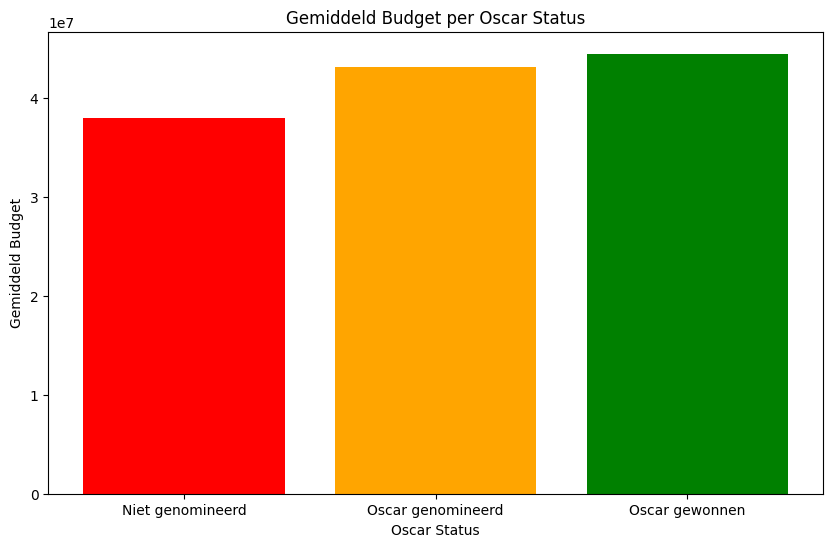

In [215]:
# Analyse van het budget: Kijk naar het gemiddelde budget per Oscar-status
budget_by_status = merged_df.groupby('categorie')['budget'].mean()

# Maak een bar chart voor het gemiddelde budget per Oscar-status
plt.figure(figsize=(10, 6))
plt.bar(budget_by_status.index, budget_by_status, color=['red', 'orange', 'green'])
plt.title('Gemiddeld Budget per Oscar Status')
plt.xlabel('Oscar Status')
plt.ylabel('Gemiddeld Budget')
plt.show()

Hieruit volgt dat de films die oscars hebben gewonnen gemiddeld een hoger budget hadden. Dit kan zeker invloed hebben op de kwaliteit van de film en welke acteurs ingehuurd kunnen worden. Laten we verder kijken in de data

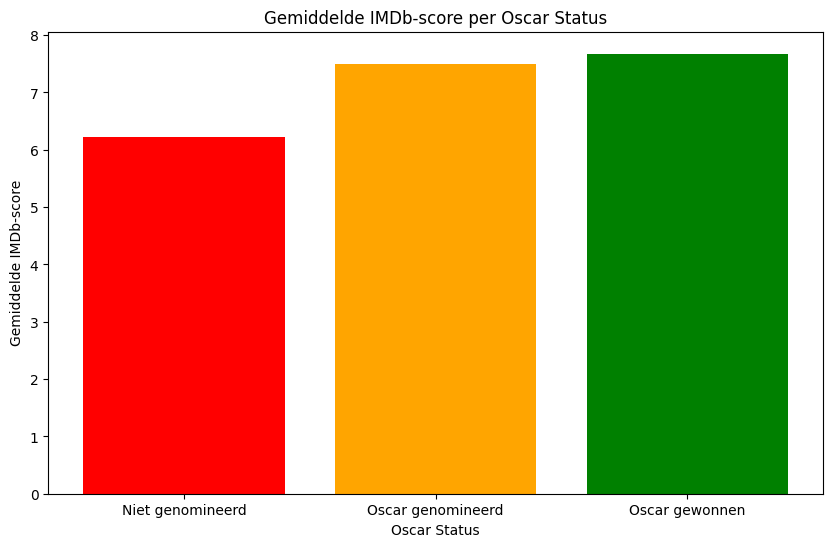

In [216]:
# Analyse van de IMDb-score: Kijk naar de gemiddelde IMDb-score per Oscar-status
imdb_by_status = merged_df.groupby('categorie')['imdb_score'].mean()

# Maak een bar chart voor de gemiddelde IMDb-score per Oscar-status
plt.figure(figsize=(10, 6))
plt.bar(imdb_by_status.index, imdb_by_status, color=['red', 'orange', 'green'])
plt.title('Gemiddelde IMDb-score per Oscar Status')
plt.xlabel('Oscar Status')
plt.ylabel('Gemiddelde IMDb-score')
plt.show()

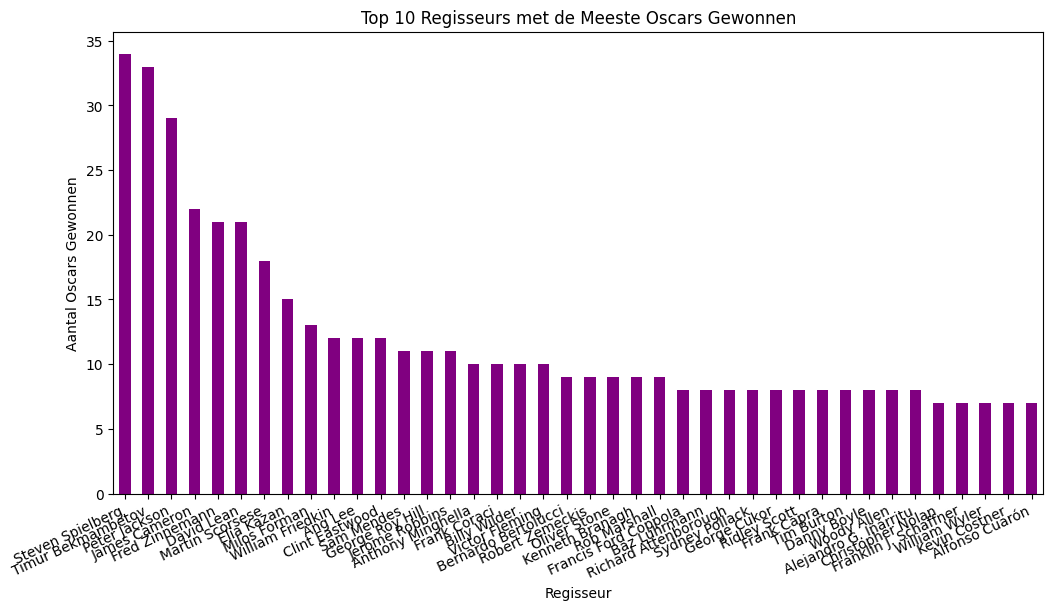

In [217]:
# Analyse van regisseurs: Kijk naar het aantal Oscars gewonnen per regisseur
director_awards = merged_df[merged_df['winner'] == True].groupby('director_name').size().sort_values(ascending=False).head(40)

# Maak een bar chart voor de top 10 regisseurs met de meeste Oscars gewonnen
plt.figure(figsize=(12, 6))
director_awards.plot(kind='bar', color='purple')
plt.title('Top 10 Regisseurs met de Meeste Oscars Gewonnen')
plt.xlabel('Regisseur')
plt.ylabel('Aantal Oscars Gewonnen')
plt.xticks(rotation=25, ha='right')
plt.show()

De regrisseur speelt zeker een rol in het behalen van een oscar. Van de gene die winnen hebben vele rond de 10 oscars gewonnen en we hebben er een paar, zoals Steven spielberg die ver boven het gemiddelde zitten. Wellicht een goede manier om een baseline model van te maken. 

### Correlatie bekijken

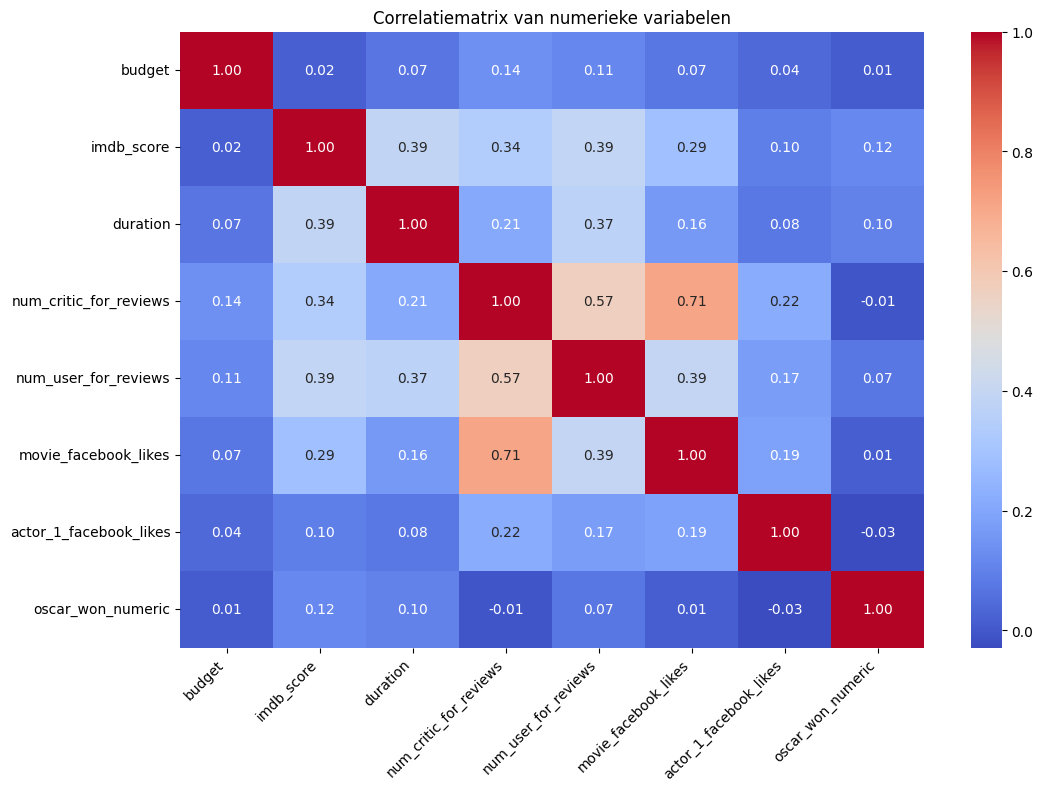

In [218]:
# Analyse van correlaties
merged_df['oscar_won_numeric'] = merged_df['winner'].apply(lambda x: 1 if x == True else (0 if x == False else None))

# Selecteer de feature variables
feat_columns = ['budget', 'imdb_score', 'duration', 'num_critic_for_reviews', 
                   'num_user_for_reviews', 'movie_facebook_likes', 'actor_1_facebook_likes']

# Voeg de 'Oscar gewonnen' kolom toe aan de selectie
correlation_data = merged_df[feat_columns + ['oscar_won_numeric']]

# Bereken de correlatiematrix
correlation_matrix = correlation_data.corr()

# Plot de correlatiematrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlatiematrix van numerieke variabelen')
plt.xticks(rotation=45, ha='right')
plt.show()


Relatief slechte correlaties laten we doorgaan naar het voorspellen.

In [219]:
# Simpele baseline: voorspellen dat geen enkele film een Oscar wint
cleaned_df = merged_df.dropna(subset=['director_name', 'oscar_won_numeric'])
y_test = cleaned_df['oscar_won_numeric'].sample(frac=0.2, random_state=42)
y_baseline_pred = [0] * len(y_test)
baseline_accuracy = accuracy_score(y_test, y_baseline_pred) * 100

print(f"Baseline Accuracy: {baseline_accuracy:.2f}")

Baseline Accuracy: 72.05


### Predicition

In [220]:
# Selecteer de features voor het model
feature_columns = ['budget', 'imdb_score', 'duration', 'num_critic_for_reviews', 
                   'num_user_for_reviews', 'movie_facebook_likes', 'actor_1_facebook_likes']

X_full = cleaned_df[feature_columns].fillna(0)
y_full = cleaned_df['oscar_won_numeric']

# Split de dataset in training en test sets
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

In [221]:
# Model 1: Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_full, y_train_full)
rf_predictions = rf_model.predict(X_test_full)
rf_accuracy = accuracy_score(y_test_full, rf_predictions)
rf_classification_report = classification_report(y_test_full, rf_predictions)

print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print("Random Forest Classification Report:\n", rf_classification_report)


Random Forest Accuracy: 0.70
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.80      0.80       501
         1.0       0.47      0.44      0.46       194

    accuracy                           0.70       695
   macro avg       0.63      0.62      0.63       695
weighted avg       0.70      0.70      0.70       695



In [222]:
# Model 2: Support Vector Classifier (SVC)
svc_model = SVC(probability=True, random_state=42)
svc_model.fit(X_train_full, y_train_full)
svc_predictions = svc_model.predict(X_test_full)
svc_accuracy = accuracy_score(y_test_full, svc_predictions)
svc_classification_report = classification_report(y_test_full, svc_predictions)

print(f"SVC Accuracy: {svc_accuracy:.2f}")
print("SVC Classification Report:\n", svc_classification_report)

SVC Accuracy: 0.72
SVC Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      1.00      0.84       501
         1.0       0.00      0.00      0.00       194

    accuracy                           0.72       695
   macro avg       0.36      0.50      0.42       695
weighted avg       0.52      0.72      0.60       695



c:\Users\yulas\anaconda3\envs\CM2024\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yulas\anaconda3\envs\CM2024\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yulas\anaconda3\envs\CM2024\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Conclusie onderzoeksvraag 2

De data is dus niet goed gemerged en zal verder onderzocht moeten worden

## Onderzoeksvraag 3: Hoe kunnen budget en omzet worden gebruikt om logische clusters van de films te vinden?


In [223]:
dfr = pd.read_csv('data/movie-1.csv')

# Toon de maximale informatie die de dataframe kan geven.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Formatteer alle grote getallen voor een betere leesbaarheid.
pd.set_option('display.float_format', '{:,.2f}'.format)

In [224]:
df = dfr.copy()

Om clusters te bepalen in een dataset gaan we nu gebruik maken van unsupervised learning. De algoritmes die we gaan toepassen zijn KMeans en GMM.

We maken een nieuw dataframe aan met 'gross' en 'budget'.

In [225]:
df_gross_budget = dfr[['gross', 'budget']]

Bekijken hoeveel NaN values in de dataset voorkomen.

In [226]:
df_gross_budget.isna().sum()

gross     884
budget    492
dtype: int64

Bekijken hoeveel rows het volledige df bevat. Als de NaN waardes maar een klein percentage van de volledige dataset bevat kunnen deze worden verwijderd. Als het een groot percentage bevat dan moeten we kijken of we dit logisch in kunnen vullen


aantal rows in de totale datasframe: 5043
aantal nan rows in de totale datasframe: 1152
Bevat NaN rows t.o.v. totale dataframe: 22.8%


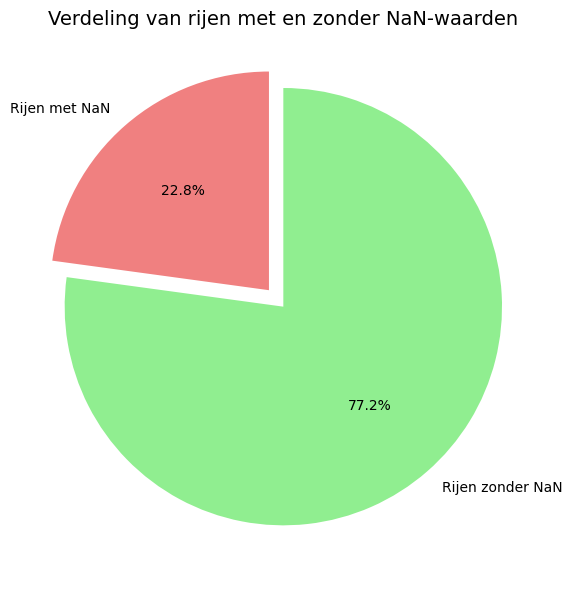

In [227]:
total_rows = len(df_gross_budget)
print(f'aantal rows in de totale datasframe: {total_rows}')
nan_rows = df_gross_budget.isna().any(axis=1).sum()
print(f'aantal nan rows in de totale datasframe: {nan_rows}')
nan_percentage_rows = ((nan_rows / total_rows) * 100).round(1)
print(f'Bevat NaN rows t.o.v. totale dataframe: {nan_percentage_rows}%')

# Plotten
labels = ['Rijen met NaN', 'Rijen zonder NaN']
values = [nan_rows, total_rows - nan_rows]

plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'], explode=[0.1, 0])
plt.title('Verdeling van rijen met en zonder NaN-waarden', fontsize=14)
plt.tight_layout()
plt.show()

Dit is een aanzienlijk groot percentage NaN's. We gaan de data opvullen. Maar eerst moeten we bekijken welke kolommen uit de dataset het meest correleren. De kolommen die het meest correleren met gross en budget kunnen worden gebruikt om de missende data in te vullen.


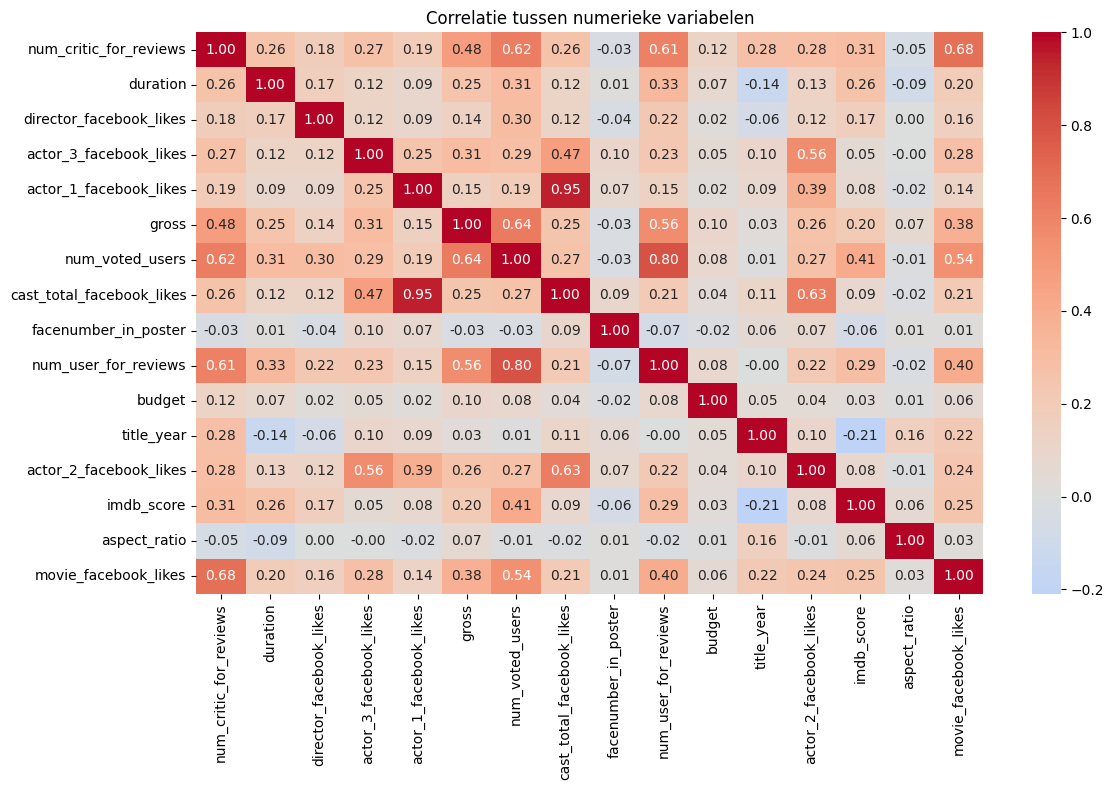


Top 5 correlaties met budget:
budget                   1.00
num_critic_for_reviews   0.12
gross                    0.10
num_user_for_reviews     0.08
num_voted_users          0.08
Name: budget, dtype: float64

Top 5 correlaties met gross:
gross                    1.00
num_voted_users          0.64
num_user_for_reviews     0.56
num_critic_for_reviews   0.48
movie_facebook_likes     0.38
Name: gross, dtype: float64


In [228]:
# Selecteer numerieke kolommen voor correlatie analyse
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Plot correlatie heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, 
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f')
plt.title('Correlatie tussen numerieke variabelen')
plt.tight_layout()
plt.show()

# Print de top 5 correlaties met budget en gross
print("\nTop 5 correlaties met budget:")
budget_correlations = correlation_matrix['budget'].sort_values(ascending=False)
print(budget_correlations.head())

print("\nTop 5 correlaties met gross:")
gross_correlations = correlation_matrix['gross'].sort_values(ascending=False)
print(gross_correlations.head())

De enige matige correlaties zijn tussen de gross en num_voted_users en num_users_for_reviews. We zullen deze 2 kolommen gebruiken om de missende NaN values in te vullen van gross. 


In [229]:
# Vul missende waarden van 'gross' in op basis van gemiddelden per cluster
# Cluster bepalen op basis van 'num_voted_users' en 'num_user_for_reviews'

# Maak een nieuwe kolom voor clustering (bijvoorbeeld afronden van aantallen gebruikers)
df['cluster'] = (
    df['num_voted_users'].fillna(0).round(-3).astype(int).astype(str) + '_' +
    df['num_user_for_reviews'].fillna(0).round(-2).astype(int).astype(str)
)

# Bereken gemiddelde 'gross' per cluster
cluster_gross_mean = df.groupby('cluster')['gross'].mean()

# Vul NaN-waarden van 'gross' in met de gemiddelden per cluster
df['gross'] = df.apply(
    lambda row: cluster_gross_mean[row['cluster']] if pd.isna(row['gross']) else row['gross'],
    axis=1
)

# Verwijder tijdelijke clusterkolom
df.drop(columns=['cluster'], inplace=True)


Weer opnieuw een dataframe maken met alleen gross en budget maar dan met de ingevulde gross kolom.

In [230]:
df = df[['gross', 'budget']]

Weer alle NaN values checken

In [231]:
df.isna().sum()

gross      23
budget    492
dtype: int64

Opnieuw bekijken hoeveel procent NaN waarden bevat.

aantal rows in de totale datasframe: 5043
aantal nan rows in de totale datasframe: 510
Bevat NaN rows t.o.v. totale dataframe: 10.1%


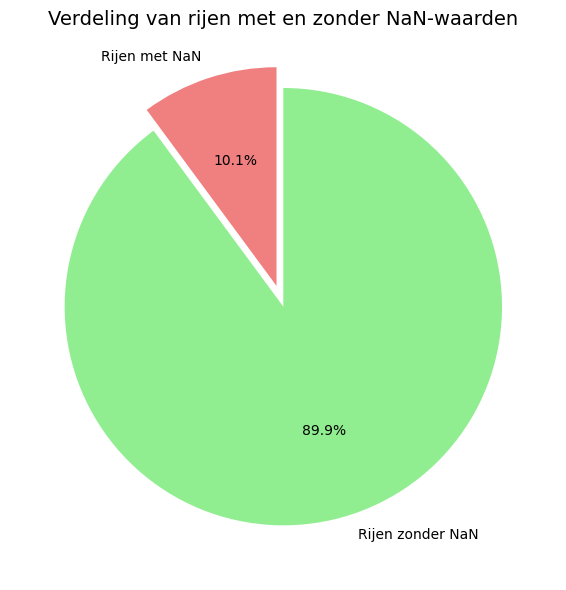

In [232]:
total_rows = len(df)
print(f'aantal rows in de totale datasframe: {total_rows}')
nan_rows = df.isna().any(axis=1).sum()
print(f'aantal nan rows in de totale datasframe: {nan_rows}')
nan_percentage_rows = ((nan_rows / total_rows) * 100).round(1)
print(f'Bevat NaN rows t.o.v. totale dataframe: {nan_percentage_rows}%')

# Plotten
labels = ['Rijen met NaN', 'Rijen zonder NaN']
values = [nan_rows, total_rows - nan_rows]

plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'], explode=[0.1, 0])
plt.title('Verdeling van rijen met en zonder NaN-waarden', fontsize=14)
plt.tight_layout()
plt.show()

We hebben het aantal NaN values verlaagd van 22.8% tot 10.1%. Dit is nogsteeds relatief veel maar helaas is er weinig correlatie met de budget kolom waardoor we deze niet verder in kunnen vullen. Daarom kiezen we ervoor om de resterende NaN waarden te verwijderen.

Alle NaN's verwijderen

In [233]:
df = df.dropna()

Opnieuw bekijken hoeveel NaN's in de dataset voorkomen. Na het verwijderen ervan moeten ze voor allebei op 0 staan.

In [234]:
df.isna().sum()

gross     0
budget    0
dtype: int64

Het dataframe bekijken

In [235]:
df.head(10)

,gross,budget
0,"760,505,847.00","237,000,000.00"
1,"309,404,152.00","300,000,000.00"
2,"200,074,175.00","245,000,000.00"
3,"448,130,642.00","250,000,000.00"
5,"73,058,679.00","263,700,000.00"
6,"336,530,303.00","258,000,000.00"
7,"200,807,262.00","260,000,000.00"
8,"458,991,599.00","250,000,000.00"
9,"301,956,980.00","250,000,000.00"
10,"330,249,062.00","250,000,000.00"


## Verwijderen van outliers ##

Omdat de modellen gevoelig zijn voor outliers gaan we identificeren welke we gaan verwijderen.

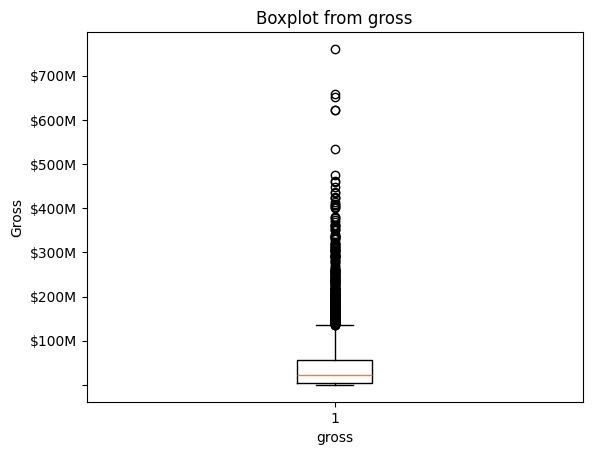

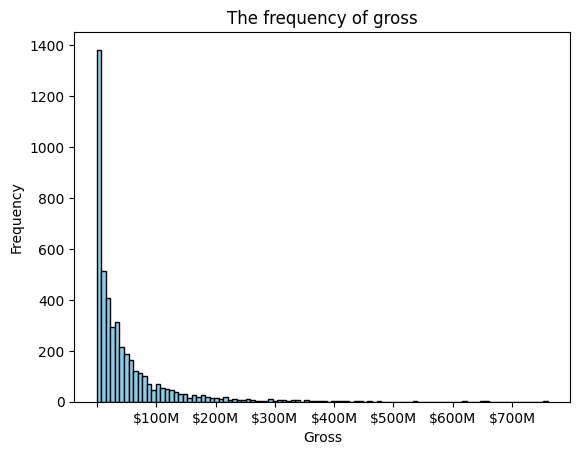

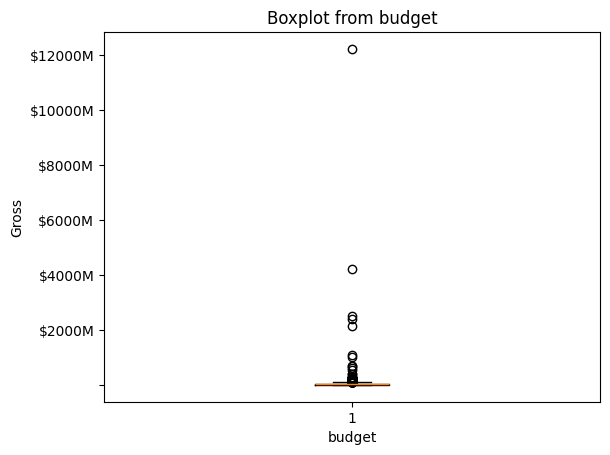

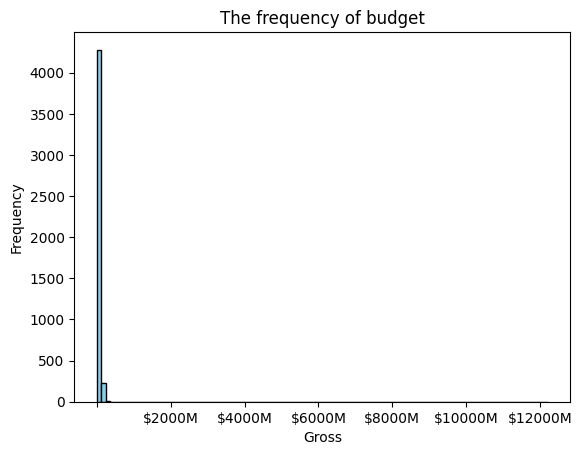

In [236]:
fn.boxplot_gross_and_budget(df, 'gross')
fn.histogram_gross(df, 'gross')

fn.boxplot_gross_and_budget(df, 'budget')
fn.histogram_gross(df, 'budget')

Als we kijken naar een combinatie van de boxplots en histogrammen, dan zien we dat er extreme outliers in onze dataset voorkomen. Onze onderzoeksvraag vraagt niet om bijzondere gevallen te bepalen, maar om logische clusters te bepalen, wat na verwijderen van de outliers nogsteeds kan worden gedaan. Hierdoor besluiten we alle outliers te verwijderen uit onze dataset. Hierbij maken we gebruik van de functies uit functies.py. Ook bekijken we het aantal rijen en kolommen voordat we ze gaan verwijderen om te checken of ze echt zijn verwijderd.

In [237]:
df.shape

(4533, 2)

In [238]:
df = fn.remove_outliers(df, 'gross')
df = fn.remove_outliers(df, 'budget')

Checken of de outliers zijn verwijderd door het aantal rijen en kolommen te bekijken. Dit is inderdaad een lager getal dan eerst, wat betekend dat ze zijn verwijderd.

In [239]:
df.shape

(3938, 2)

Ook bekijken we de histogrammen opnieuw. De x as moet een bereik hebben wat overeenkomt met wat we op de boxplots zagen. 

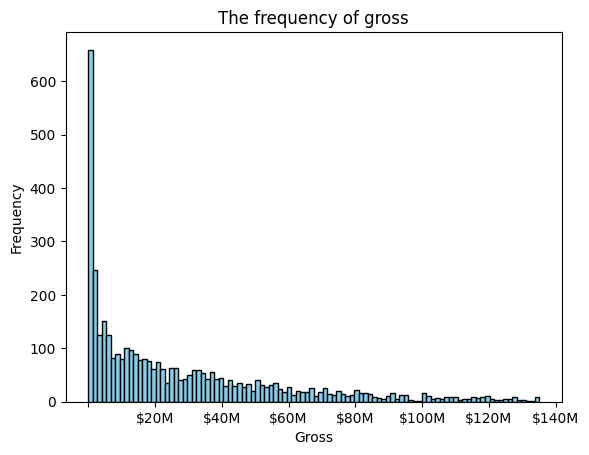

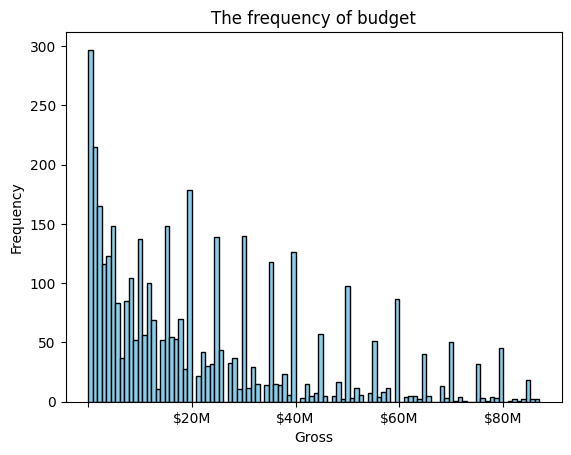

In [240]:
fn.histogram_gross(df, 'gross')
fn.histogram_gross(df, 'budget')

Het bereik op de x as komt inderdaad overeen met wat we zagen in de boxplots voordat we de outliers hebben verwijderd.

Nu gaan we kijken of er na opvulling en opschoning van onze dataset logische clusters kunnen worden bepaald met unsupervised learning. De 2 modellen die we gebruiken zijn kmeans en gmm. We gebruiken deze 2 modellen omdat ze relatief eenvoudig, efficiënt en effectief zijn bij het vinden van clusters in onze continueu data. Kmeans kan goed voor bolvormige clusters modelleren en gmm kan goed verschillende vormen moddeleren doordat het flexibeler is.

In [241]:
# Code afkomstig van les CM10
# kMeans en GMM maken gebruik van afstandsmaten, daarom is standaardiseren belangrijk
df.reset_index(inplace = True)

# We passen scaling toe zodat de afstandmaten beter zijn verdeeld onder elkaar.
scaler = StandardScaler()
scaler.fit(df[['gross', 'budget']])
df_z = pd.DataFrame(scaler.transform(df[['gross', 'budget']]), columns=['gross_z', 'budget_z'])
df[['gross_z', 'budget_z']] = df_z

Kijken of de correcte kolommen zijn aangemaakt. gross_z en budget_z zijn inderdaad aangemaakt.

In [242]:
df.head(5)

,index,gross,budget,gross_z,budget_z
0,177,"16,523,776.26","1,500,000.00",-0.37,-0.98
1,214,"119,412,921.00","65,000,000.00",3.03,2.08
2,215,"32,694,788.00","85,000,000.00",0.16,3.05
3,242,"46,314,723.00","78,000,000.00",0.61,2.71
4,306,"66,862,068.00","83,000,000.00",1.29,2.95


## Moddeleren

We gaan als eerst KMeans toepassen op onze dataset en bekijken welke clusters dit moddeleert. We kiezen hier handmatig 5 clusters. Dit doen we omdat onze hoofdvraag vraagt om 5 clusters: blockbuster films, flop films, cult films, mid range films en rest van de films.

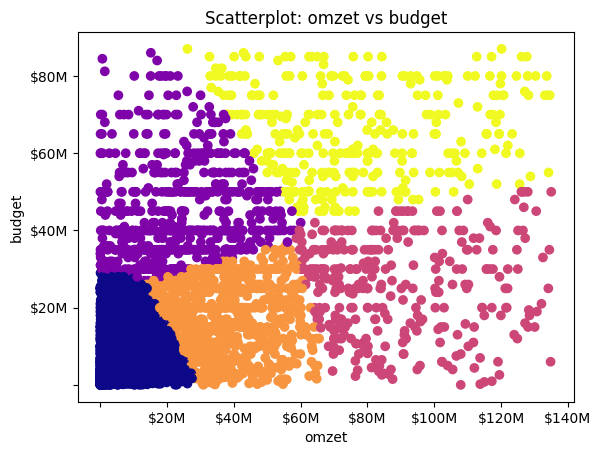

In [243]:
# Maken van een willekeurige clustering
model_kMeans = KMeans(n_clusters=5, random_state=0)
X_kMeans = df[['gross_z', 'budget_z']]

# Clusters 'voorspellen' en opslaan
prediction_kMeans = model_kMeans.fit_predict(X_kMeans)
df['cluster_number'] = model_kMeans.predict(X_kMeans)

# Plotten van 'omzet' en 'budget' en als kleur de clusters
plt.scatter(df['gross'], df['budget'], c=df['cluster_number'], cmap='plasma')
plt.gca().xaxis.set_major_formatter(FuncFormatter(fn.euro_formatter))
plt.gca().yaxis.set_major_formatter(FuncFormatter(fn.euro_formatter))
plt.title('Scatterplot: omzet vs budget')
plt.xlabel('omzet')
plt.ylabel('budget')
plt.show()

Als we naar de plot kijken zien we dat KMeans uitstekende logische clusters kan vormen. Alle kleuren staan gegroupeerd bij elkaar met logische parameters per groep. Helaas geeft dit geen clusters die overeenkomen met de 5 soorten films uit onze hoofdvraag. 

Om nog even bij KMeans te blijven gaan we hier de 'elbow method' toepassen. Dit doen we omdat dit het punt is waar het toevoegen van extra clusters nauwelijks meer leidt tot een significante verbetering in de clusteringkwaliteit. Als de 'knik' valt op 5 weten we dat dit het optimale punt is om te zoeken naar clusters.

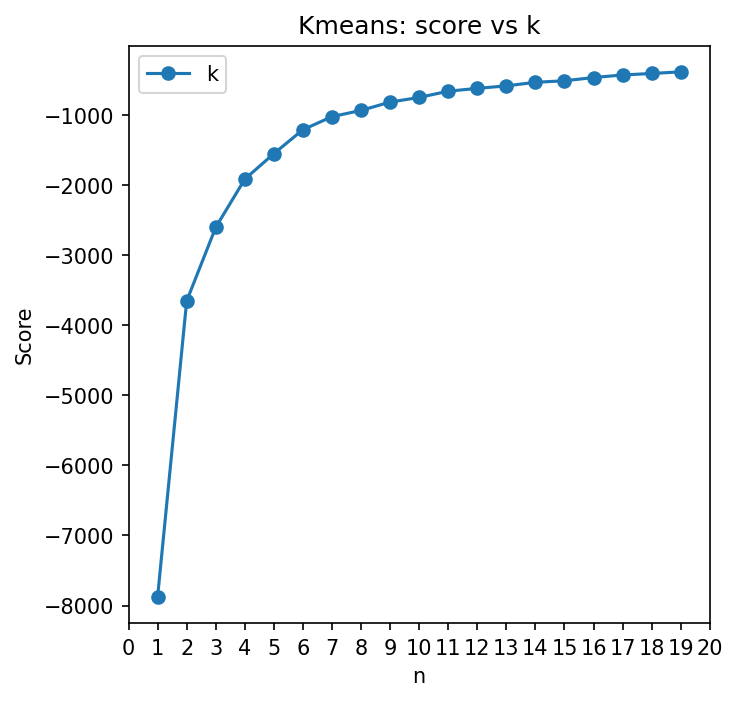

In [244]:
# Code afkomstig van les CM10

data = []

max_k = 20

for i in range(1, max_k):
    model_kMeans = KMeans(n_clusters=i, random_state=0)
    X_kMeans = df[['gross_z', 'budget_z']]

    # Clusters 'voorspellen' en opslaan
    model_kMeans.fit(X_kMeans)

    data.append([i, model_kMeans.score(X_kMeans)])

df_plot_kmeans = pd.DataFrame(data, columns=['k', 'Score'])

fig = plt.figure(figsize=(5,5), dpi=150)

ax = plt.axes()

ax.set(xlim=(0,max_k),
       xlabel='n',
       ylabel='Score',
       title='Kmeans: score vs k')

ax.xaxis.set_major_locator(plt.MaxNLocator(max_k))
ax.ticklabel_format(useOffset=False)
ax.plot(df_plot_kmeans['k'], df_plot_kmeans['Score'], '-o')

ax.legend(['k'])

Als we kijken naar de plot van de 'elbow method' zien we dat de 'knik' zit bij n=2. Dit punt geeft de optimale balans in modelcomplexiteit en clusteringkwaliteit. De knik valt dus niet op 5, wat betekend dat we eerder met n=5 hebben overclusterd. Dit betekent niet dat het geen logische clusters heeft gevonden, maar wel dat het overcomplexe clusters probeert te vinden zonder dat de kwaliteit van de clusters omhoog gaat. Hieronder plotten we de optimale balans met n=2.

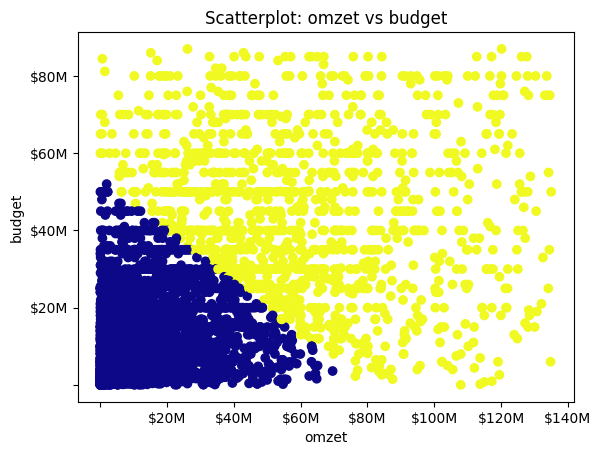

In [245]:
# Maken van een willekeurige clustering
model_kMeans = KMeans(n_clusters=2, random_state=0)
X_kMeans = df[['gross_z', 'budget_z']]

# Clusters 'voorspellen' en opslaan
prediction_kMeans = model_kMeans.fit_predict(X_kMeans)
df['cluster_number'] = model_kMeans.predict(X_kMeans)

# Plotten van 'omzet' en 'budget' en als kleur de clusters
plt.scatter(df['gross'], df['budget'], c=df['cluster_number'], cmap='plasma')
plt.gca().xaxis.set_major_formatter(FuncFormatter(fn.euro_formatter))
plt.gca().yaxis.set_major_formatter(FuncFormatter(fn.euro_formatter))
plt.title('Scatterplot: omzet vs budget')
plt.xlabel('omzet')
plt.ylabel('budget')
plt.show()

Ook dit geeft weer logische clusters zoals laag budget en omzet en hoog budget en omzet, maar geen clusters die slaan op onze hoofdvraag.

Nu gaan we hetzelfde doen maar dan met GMM.

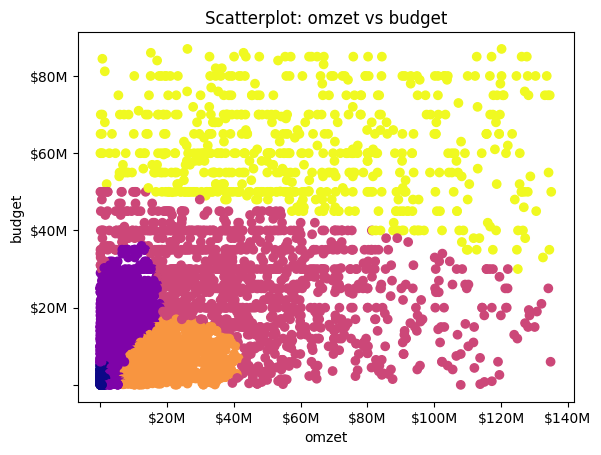

In [246]:
# Maken van een willekeurige clustering
model_gmm = gmm(n_components=5, random_state=0)
X_gmm = df[['gross_z', 'budget_z']]

# Clusters 'voorspellen' en opslaan
prediction_gmm = model_gmm.fit_predict(X_gmm)
df['cluster_number'] = model_gmm.predict(X_gmm)

# Plotten van 'omzet' en 'budget' en als kleur de clusters
plt.scatter(df['gross'], df['budget'], c=df['cluster_number'], cmap='plasma')
plt.gca().xaxis.set_major_formatter(FuncFormatter(fn.euro_formatter))
plt.gca().yaxis.set_major_formatter(FuncFormatter(fn.euro_formatter))
plt.title('Scatterplot: omzet vs budget')
plt.xlabel('omzet')
plt.ylabel('budget')
plt.show()

Ook hier zie je dat het clusters maakt die logisch zijn maar weer niet slaan op onze hoofdvraag. De vormen zijn wat flexibeler en rondvormig, wat een kenmerk is van gmm.

Dan gaan we kijken naar de elbow method voor gmm.

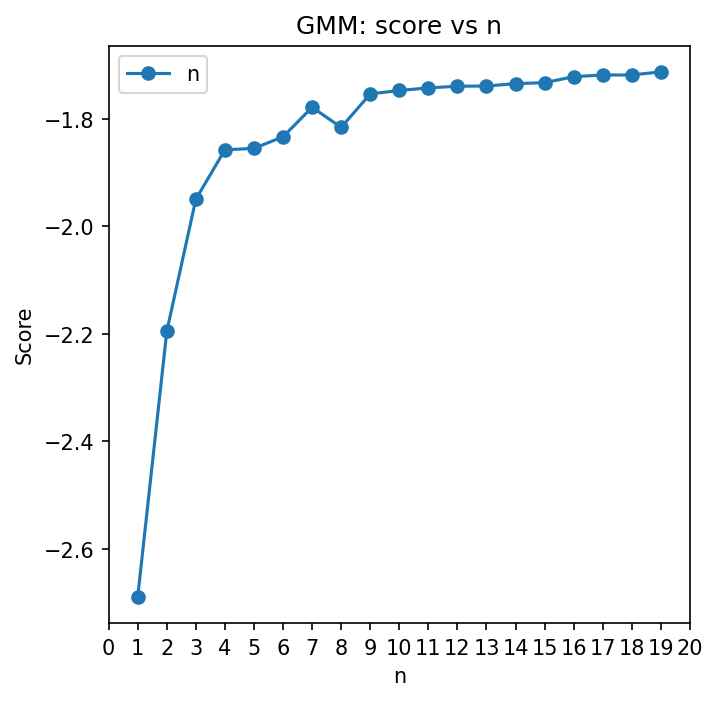

In [247]:
# Code afkomstig van les CM10
data = []

max_n = 20

for i in range(1, max_k):
    model_gmm = gmm(n_components=i, random_state=0)
    X_gmm = df[['gross_z', 'budget_z']]

    prediction_gmm = model_gmm.fit(X_gmm)
    data.append([i, model_gmm.score(X_gmm)])

df_plot_gmm = pd.DataFrame(data, columns=['n', 'Score'])

fig = plt.figure(figsize=(5,5), dpi=150)

ax = plt.axes()

ax.set(xlim=(0,max_n),
       xlabel='n',
       ylabel='Score',
       title='GMM: score vs n')

ax.xaxis.set_major_locator(plt.MaxNLocator(20))
ax.ticklabel_format(useOffset=False)
ax.plot(df_plot_gmm['n'], df_plot_gmm['Score'], '-o')

ax.legend(['n'])

De knik bij de elbow method voor gmm zit op 4. Dit punt geeft de optimale balans in modelcomplexiteit en clusteringkwaliteit. De knik valt dus niet op 5, wat betekend dat we eerder met n=5 hebben overclusterd. Dit betekent niet dat het geen logische clusters heeft gevonden, maar wel dat het overcomplexe clusters probeert te vinden zonder dat de kwaliteit van de clusters omhoog gaat. Zeker bij deze want hier flatlined de plot tussen 4 en 5. Hieronder plotten we de optimale balans met n=4.

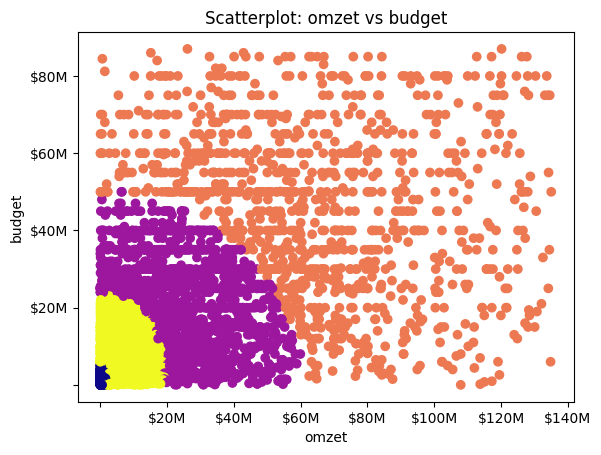

In [248]:
# Maken van een willekeurige clustering
model_gmm = gmm(n_components=4, random_state=0)
X_gmm = df[['gross_z', 'budget_z']]

# Clusters 'voorspellen' en opslaan
prediction_gmm = model_gmm.fit_predict(X_gmm)
df['cluster_number'] = model_gmm.predict(X_gmm)

# Plotten van 'omzet' en 'budget' en als kleur de clusters
plt.scatter(df['gross'], df['budget'], c=df['cluster_number'], cmap='plasma')
plt.gca().xaxis.set_major_formatter(FuncFormatter(fn.euro_formatter))
plt.gca().yaxis.set_major_formatter(FuncFormatter(fn.euro_formatter))
plt.title('Scatterplot: omzet vs budget')
plt.xlabel('omzet')
plt.ylabel('budget')
plt.show()

Ook hier zie je dat het clusters maakt die logisch zijn maar weer niet slaan op onze hoofdvraag. De logische clusters hebben allemaal dezelfde combinatie van hoeveelheid in budget en omzet. De vormen zijn wat flexibeler en rondvormig, wat een kenmerk is van gmm.

Natuurlijk zouden we dit zelf wel kunnen maken op basis van een paar regels, namelijk:

Het opdelen van de films in 5 categorieën.

1. Blockbuster: hoog budget met hoge omzet
2. Flop: hoog budget met lage omzet
3. Cultfilm: laag budget met hoge omzet
4. Mid-Range Movie: Gemiddeld budget met gemiddelde omzet
5. Average: Alle andere gevallen

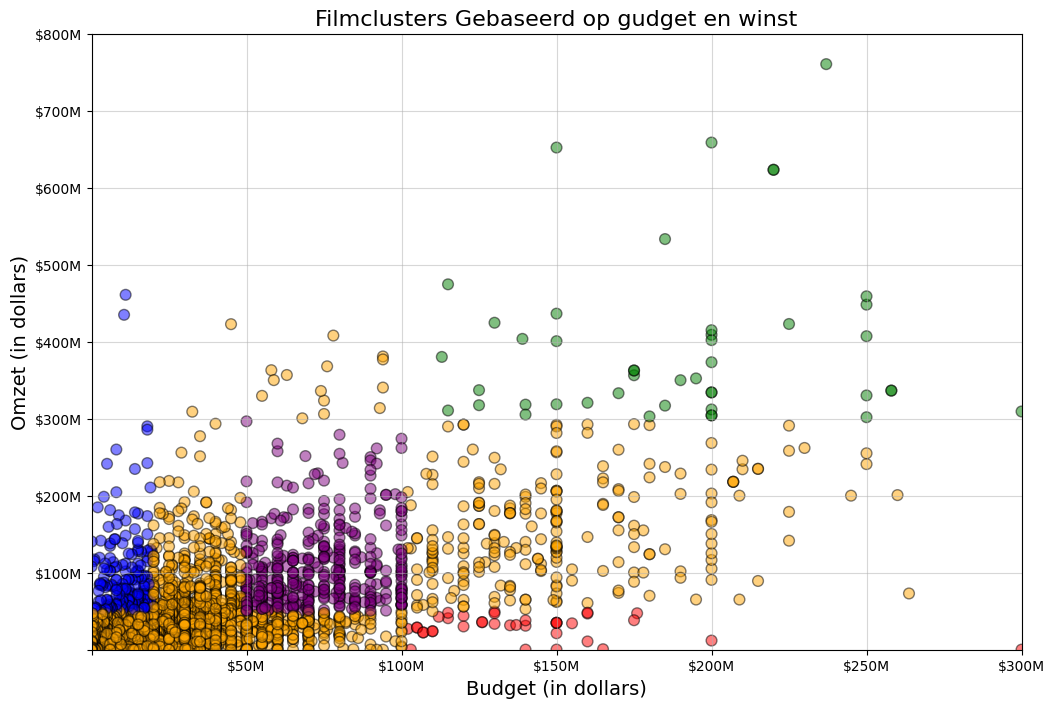

In [249]:
# In volledige dataFrame, alle NaN waarde verwijderen van budget en gross.
df = dfr[['budget', 'gross']].dropna()

# Extreme waarde van budget en gross worden ook verwijderd.
df = df[(df['budget'] < 350000000) & (df['gross'] < 1000000000)] \

# Zie functies.py voor de functie classify_movie
df['Category'] = df.apply(fn.classify_movie, axis=1)

# Scatterplot Visualiseren met kleur
plt.figure(figsize=(12, 8))
colors = {'Blockbuster':'green', 'Flop':'red', 'Cultfilm':'blue', 'Average':'orange', 'Mid-Range Movie':'purple'}
scatter = plt.scatter(df['budget'], df['gross'], 
                      c=df['Category'].map(colors), alpha=0.5, s=60, edgecolor='k', marker='o')

# Titel en labels
plt.title('Filmclusters Gebaseerd op gudget en winst', fontsize=16)
plt.xlabel('Budget (in dollars)', fontsize=14)
plt.ylabel('Omzet (in dollars)', fontsize=14)

# Weergavegrenzen
plt.xlim(0, 300000000)  
plt.ylim(0, 800000000) 

# Grafiek lijn
plt.grid(True, linestyle='-', alpha=0.5)

plt.gca().xaxis.set_major_formatter(FuncFormatter(fn.euro_formatter))
plt.gca().yaxis.set_major_formatter(FuncFormatter(fn.euro_formatter))

plt.show()

**Kleur en kermerken van de clusters in de scatterplot**

- **Groen: blockbuster films**

Deze films zijn met een hoog budget (> 100 miljoen dollar) en met een hoge omzet (>300 miljoen dollar).

We zien groene cluster rechterboven in de grafiek. De succesvolle films.


- **Rood: flop films**

Deze films zijn met een hoog budget (> 100 miljoen dollar) en met een lage omzet (<50 miljoen dollar).

We zien rode cluster rechtsonder in de grafiek. Deze is een klein cluster.


- **Blauw: cultfilms**

Deze films zijn met een laag budget (<20 miljoen dollar) en met een relatief hoge omzet (>50 miljoen dollar).

We zien blauwe cluster linkerboven in de grafiek. Dit cluster laten zien de films met een laag budget toch tot een groot succes kan zijn.


- **Paars: mid range films**

Deze films zijn met een middelgroot budget (50-100 miljoen dollar) en met een middelgroot omzet (50-300 miljoen dollar).

We zien paarse cluster midden in de grafiek. Deze is een groot cluster, betekent er zijn heel veel prima films.


- **Orange: rest van de films**

Alle film die niet in bovenstaande categorieën.

We zien orange cluster verspreid over de grafiek. Er zijn heel veel films die gewoon middelmatige resultaten halen, dus niet te ondersheiden in budget of omzet.



## Conclusie onderzoeksvraag 3


Door middel van unsupervised learning kunnen er logische clusters gemaakt worden. Alle 2 de modellen presteren hier goed in. De kleuren zijn niet verspreid van elkaar wat dit aanduidt. Er is echter geen goed onderscheid te maken tussen blockbusters, flops en cultfilms als je kijkt naar de kleuren van de clusters. Zelfs met verschillende k waarden van beide modellen wordt het er niet beter op.

We kunnen wel door middel van rule based tabellen een logische cluster maken. Maar goed, dat is supervised en niet unsupervised learning.

Het is dus mogelijk om logische clusters te vinden met onze unsupervised technieken, maar deze kunnen geen onderscheid vinden tussen de 5 verschillende films.